<a href="https://colab.research.google.com/github/data602sps/assignments/blob/master/05_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**

# Introduction

The dataset I am using is called "Salary Data with Age and Experience" from Kaggle. Here is the link: https://www.kaggle.com/datasets/codebreaker619/salary-data-with-age-and-experience?resource=download.

______________
# Data Exploration

### Import Data and Libraries

In the following code, I will import the pandas, numpy, matplotlib, and seaborn libraries. I will use pandas to import the data. 

In [2]:
import pandas as pd # import pandas
import numpy as np # import numpy
import matplotlib.pyplot as plt #import matplotlib
import seaborn as sns # import seaborn

path = "/Users/kristinlussi/Documents/MSDS/DATA602/Week10/Salary_Data.csv"
salary_data = pd.read_csv(path) 

### Glimpse of Data

In the following code, I show the first 5 rows of the data, the length of the data frame, and the data types of each column. There are 30 rows in the data frame. All three columns are numeric (float or integers).

In [3]:
print(salary_data.head()) # show the first 5 rows of the data
print(len(salary_data)) # print the length of the data set - 30 rows
print(salary_data.dtypes) # print the data types of each column

   YearsExperience   Age  Salary
0              1.1  21.0   39343
1              1.3  21.5   46205
2              1.5  21.7   37731
3              2.0  22.0   43525
4              2.2  22.2   39891
30
YearsExperience    float64
Age                float64
Salary               int64
dtype: object


### Summary Statistics

The following code will provide the summary statistics of the data.

In [4]:
summary_statistics = salary_data.describe() # perform .describe() on the salary data to get the summary statistics
print(summary_statistics) # print the summary statistics 

       YearsExperience        Age         Salary
count        30.000000  30.000000      30.000000
mean          5.313333  27.216667   76003.000000
std           2.837888   5.161267   27414.429785
min           1.100000  21.000000   37731.000000
25%           3.200000  23.300000   56720.750000
50%           4.700000  25.000000   65237.000000
75%           7.700000  30.750000  100544.750000
max          10.500000  38.000000  122391.000000


### Missing Values

In the following code, I dropped rows where there are NA's and then I checked the length of the data frame. There are still 30 rows, which is the same length as before dropping the NAs. Therefore, there are no missing values in this dataset. 

In [5]:
# drop rows where there are NAs
salary_data = salary_data.dropna() 

# print the length of the salary_data
print(len(salary_data)) # there are still 30 rows, so there are no missing values

30


# Data Wrangling

In the following section, I will perform the following data wrangling:
- sort values by age, then years experience, then salary
- change the YearsExperience column name to Experience
- create a new column for age group

Group 1 = Ages 20-24

Group 2 = Ages 25-29

Group 3 = Ages 30-34

Group 4 = Ages 35-40

In [6]:
# sort the values by age, then years experience, then salary
sorted_salary_data = salary_data.sort_values(by=["Age", "YearsExperience", "Salary"], ascending = True) 
# change the YearsExperience column name to Experience
sorted_salary_data.rename(columns = {"YearsExperience": "Experience"},inplace = True) 

# create a new column for age group
# Define the age group bins
age_bins = [20, 25, 30, 35, 40]
# Define the age group labels
age_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Add a new column for age group
sorted_salary_data['AgeGroup'] = pd.cut(sorted_salary_data['Age'], bins=age_bins, labels=age_labels, right=False)

# print the first 5 rows and last 5 rows of the updated data
print(sorted_salary_data.head())
print(sorted_salary_data.tail())

   Experience   Age  Salary AgeGroup
0         1.1  21.0   39343  Group 1
1         1.3  21.5   46205  Group 1
2         1.5  21.7   37731  Group 1
3         2.0  22.0   43525  Group 1
4         2.2  22.2   39891  Group 1
    Experience   Age  Salary AgeGroup
25         9.0  34.0  105582  Group 3
26         9.5  35.0  116969  Group 4
27         9.6  36.0  112635  Group 4
28        10.3  37.0  122391  Group 4
29        10.5  38.0  121872  Group 4


# Visualizations

### Part 1: matplotlib

#### Scatter Plot - matplotlib

The following scatter plot shows compares salaries vs. experience. I distinguished the points by different age groups and added a legend. 

I made the following modifications:
- change figure size
- changed the marker shape to square
- added x and y axis labels
- changed the font sizes for the x and y axis labels
- changed the font size for the plot title
- added a legend
- changed the legend position to upper center
- added grid lines
- defined colors for each age group

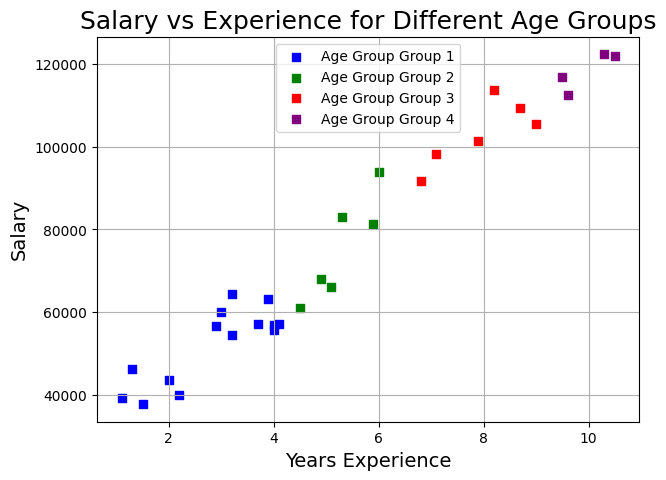

In [25]:
# Initialize a figure and axis
plt.figure(figsize=(7, 5))

# Define colors for each age group
colors = ['blue', 'green', 'red', 'purple']

# Iterate over each age group
for i, age_group in enumerate(age_labels):
    age_filter = sorted_salary_data['AgeGroup'] == age_group
    data_subset = sorted_salary_data[age_filter]
    # plot scatter plot
    plt.scatter(data_subset['Experience'], data_subset['Salary'], label=f'Age Group {age_group}', color=colors[i], marker = "s") # change marker to square shape

# customize the plot
# add x label
plt.xlabel('Years Experience', fontsize =14) # set font size to 14
# add y label 
plt.ylabel('Salary', fontsize = 14) # set font size to 14
# add title
plt.title('Salary vs Experience for Different Age Groups', fontsize = 18) # set font size to 18
# add legend
plt.legend(loc ='upper center') # change legend position to upper center
# add grid lines
plt.grid(True)

#### Bar Graph - matplotlib

The following bar graph shows the average salary by age group. I first grouped by age group and then calculated the mean salary for each group, then I plotted the results.

I made the following modifications:
- changed the figure size
- added average salary to the top of each bar
- changed the font size fo the x and y axis labels
- changed the font size for the plot title
- changed the color of the plot to skyblue

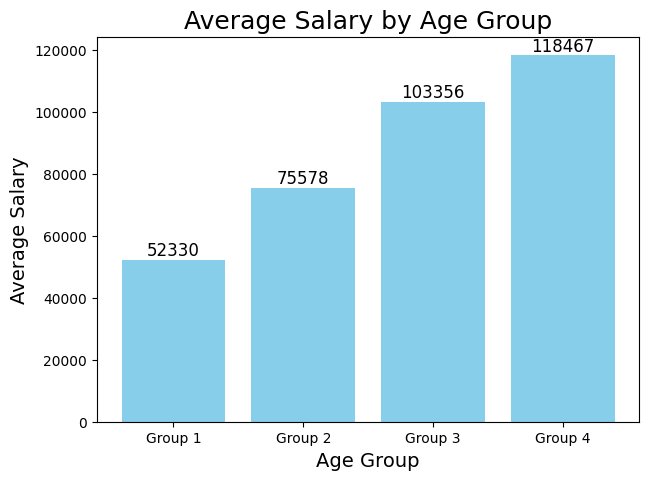

In [22]:
# Group by age group and calculate the mean salary for each group
salary_by_age_group = sorted_salary_data.groupby('AgeGroup', observed = False)['Salary'].mean()

# Initialize a figure and axis
plt.figure(figsize=(7, 5))

# Plot the bar graph
bars = plt.bar(salary_by_age_group.index, salary_by_age_group, color='skyblue') # change the color to sky blue 

# Add average salary to the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', 
             ha='center', va='bottom', fontsize=12)

# customize the plot
# add x label
plt.xlabel('Age Group', fontsize = 14) # set font size to 14
# add y label
plt.ylabel('Average Salary', fontsize = 14) # set font size to 14
# add plot title
plt.title('Average Salary by Age Group', fontsize = 18) # set font size to 18

# Show plot
plt.show()

### **Part 2: Seaborns**

In this section, I will recreate the visualizations from the previous section using the Seaborn library. 

#### Scatter Plot - Seaborns

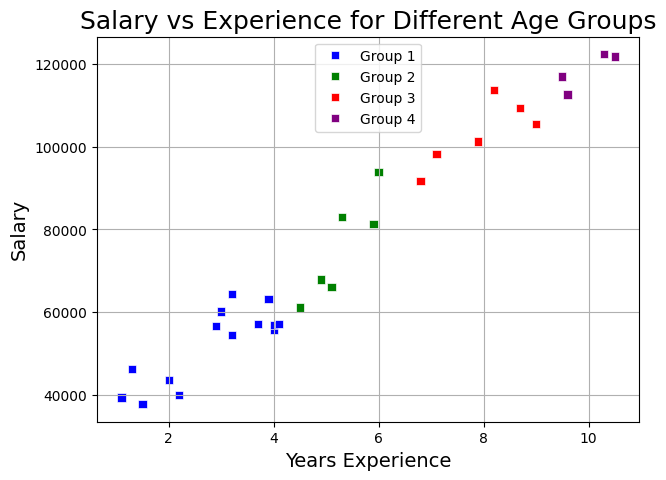

In [21]:
# Initialize a figure and axis
plt.figure(figsize=(7, 5))
ax = plt.subplot()

# Define colors for each age group
colors = ['blue', 'green', 'red', 'purple']

# Plot scatter plot using Seaborn
sns.scatterplot(data=sorted_salary_data, x='Experience', y='Salary', hue='AgeGroup', palette=colors, marker='s')

# customize the plot
# add x label
plt.xlabel('Years Experience', fontsize =14) # set font size to 14
# add y label 
plt.ylabel('Salary', fontsize = 14) # set font size to 14
# add title
plt.title('Salary vs Experience for Different Age Groups', fontsize = 18) # set font size to 18
# add legend
plt.legend(loc ='upper center') # change legend position to upper center
# add grid lines
plt.grid(True)

# show plot
plt.show()

#### Bar Graph - Seaborns

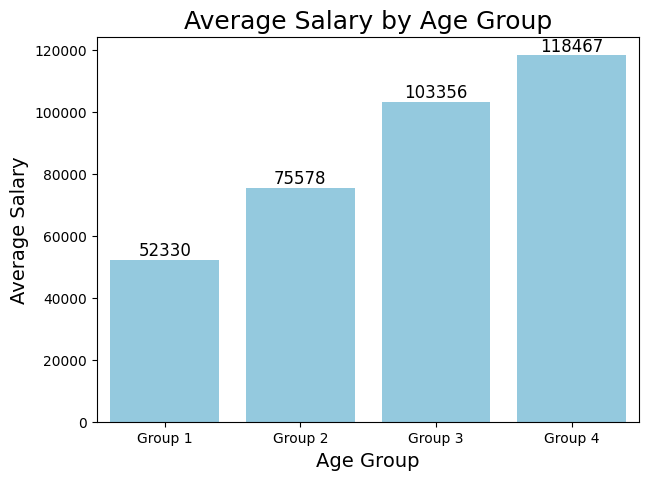

In [20]:
# Group by age group and calculate the mean salary for each group
salary_by_age_group = sorted_salary_data.groupby('AgeGroup', observed=False)['Salary'].mean().reset_index()

# Initialize a figure and axis
plt.figure(figsize=(7, 5))

# Plot the bar graph using Seaborn
sns.barplot(data=salary_by_age_group, x='AgeGroup', y='Salary', color='skyblue')

# Add average salary to the top of each bar
for index, row in salary_by_age_group.iterrows():
    plt.text(index, row['Salary'], f'{row["Salary"]:.0f}', ha='center', va='bottom', fontsize=12)

# Customize the plot
# add x label
plt.xlabel('Age Group', fontsize = 14) # set font size to 14
# add y label
plt.ylabel('Average Salary', fontsize = 14) # set font size to 14
# add plot title
plt.title('Average Salary by Age Group', fontsize = 18) # set font size to 18

# Show plot
plt.show()

### **Part 3:**
One thing I noticed with the scatter plot was that it was easier to plot the different colors by group using seaborns. Using matplotlib, we had to iterate over each age group to plot by color, but with seaborns, we could use "hue='AgeGroup', palette=colors" in the sns.scatterplot() function to distinguish the colors by age group. The "hue" parameter allows you to specify a categorical variable and automatically colors the data points accordingly. Using "palette" allowed me to specify the defined colors I wanted to use for each category. 

# Conclusions  

The analysis indicates that as individuals' age increases, their corresponding salaries tend to increase as well. This suggests a positive relationship between age and salary in the dataset. Similarly, there is a positive correlation between years of experience and salary. As individuals gain more experience in their careers, their salaries also tend to increase.

These findings are consistent with general expectations in many job markets, where individuals typically earn higher salaries as they gain more experience and advance in their careers.